In [37]:
library(xlsx)
library(imputeTS)
library(VIM)
# setwd("~/GitHub/datasci-strata-talk-missing-data")


# load data 

Minute_of_Day Inferred_Glucose
14 14            6.00            
29 29            6.05            
32 32            6.10            
43 43            6.20            
59 59            6.10            
74 74            5.90

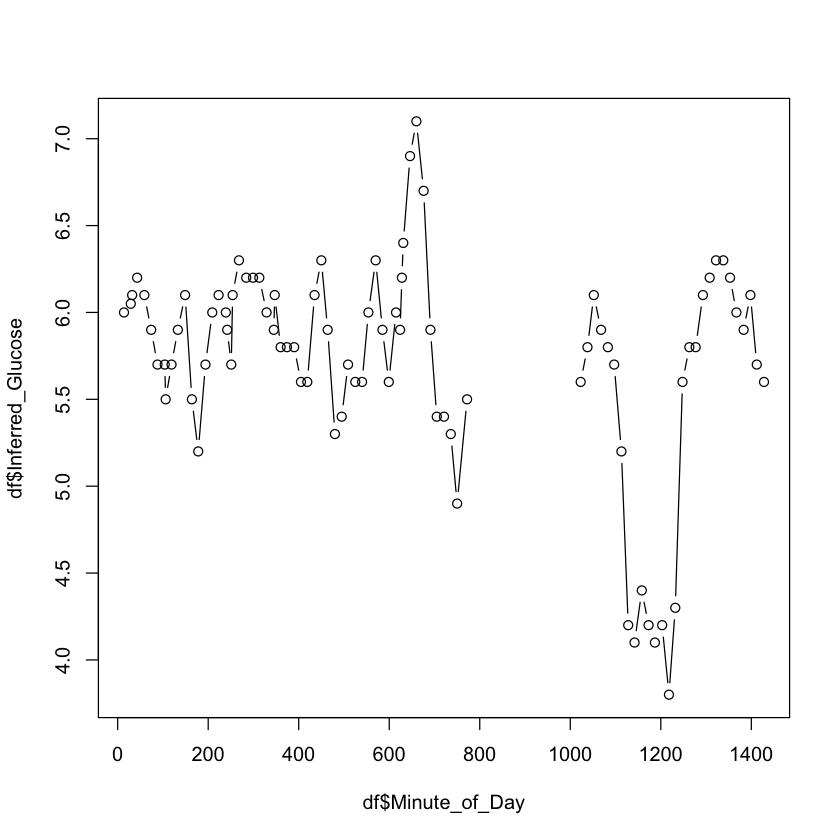

In [38]:
df <- read.xlsx("glucose.xlsx", 
                sheetName = "Sheet1")
df[1] <- NULL
rownames(df) <- df$Minute_of_Day

head(df)
plot(df$Minute_of_Day, df$Inferred_Glucose, type = 'b')

# find missing minutes
missing_minutes <- df[which(is.na(df$Inferred_Glucose)), 'Minute_of_Day']


# Nearest Neighbor

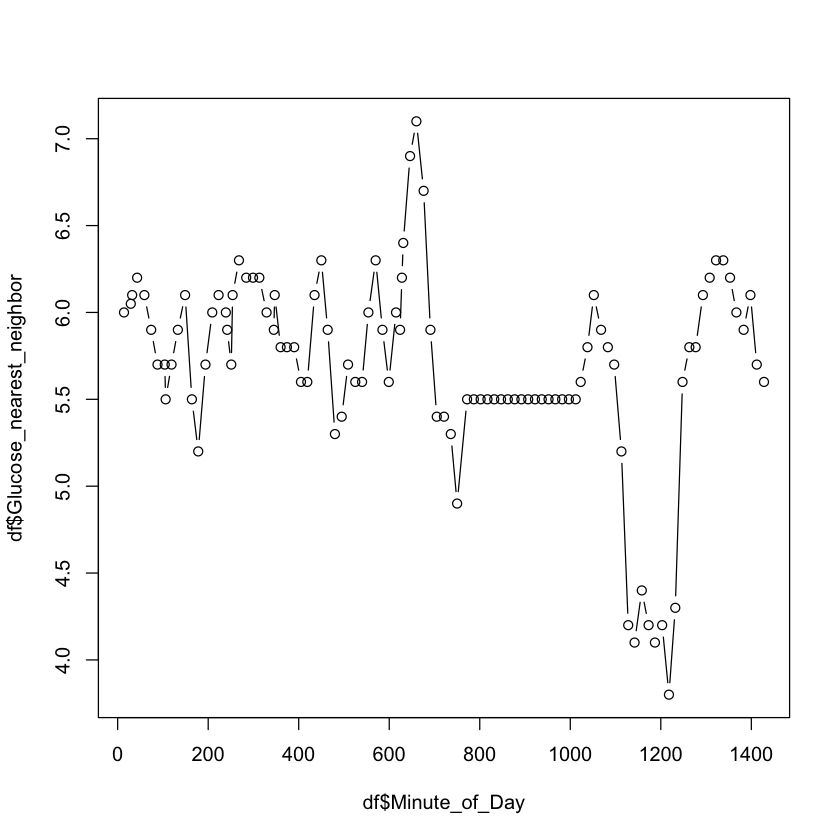

In [10]:
library(pracma)
df['Glucose_nearest_neighbor'] <- interp1(df$Minute_of_Day, df$Inferred_Glucose, method = 'nearest')
plot(df$Minute_of_Day, df$Glucose_nearest_neighbor, type = 'b')


# Last-Observed Carry Forward (LOCF)

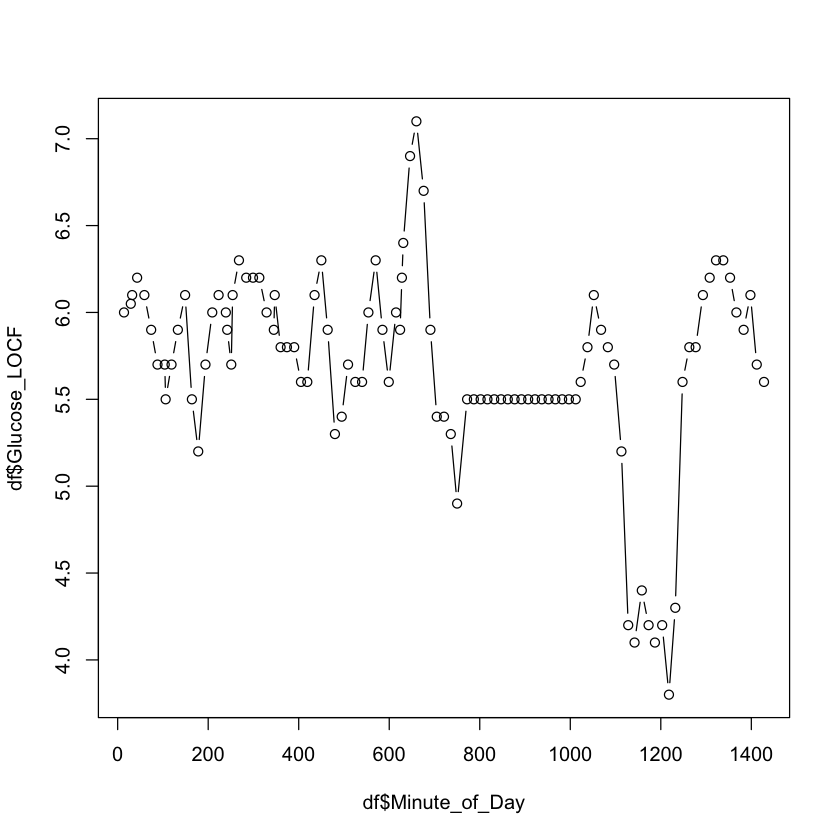

In [4]:
df['Glucose_LOCF'] <- na_locf(df$Inferred_Glucose)
plot(df$Minute_of_Day, df$Glucose_LOCF, type = 'b')


# Mean Value

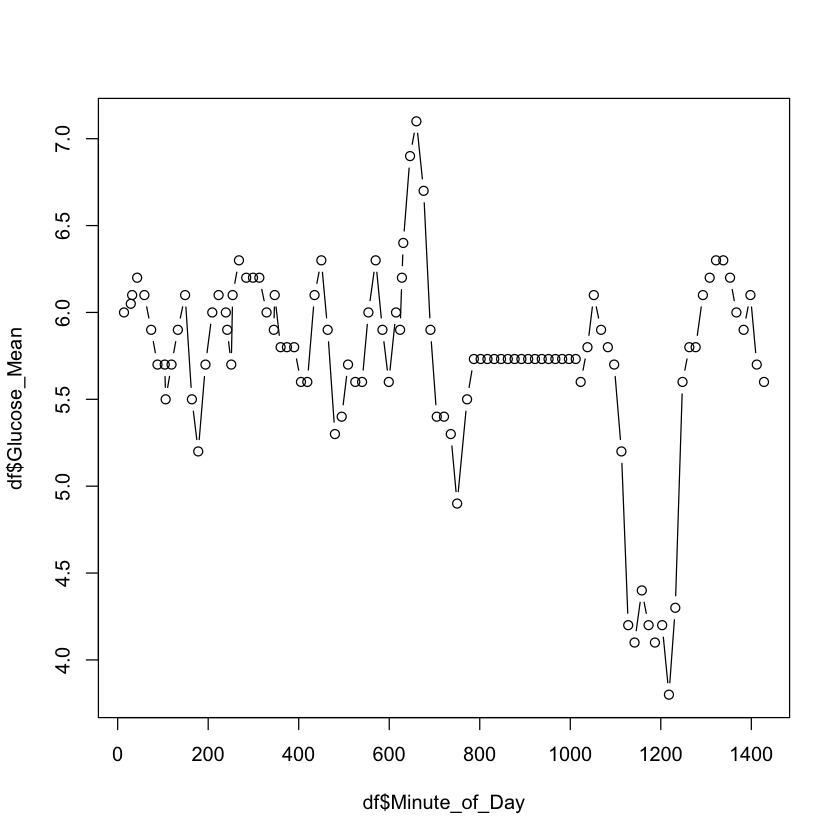

In [5]:
df['Glucose_Mean'] <- na_mean(df$Inferred_Glucose)
plot(df$Minute_of_Day, df$Glucose_Mean, type = 'b')


# Linear Interpolation

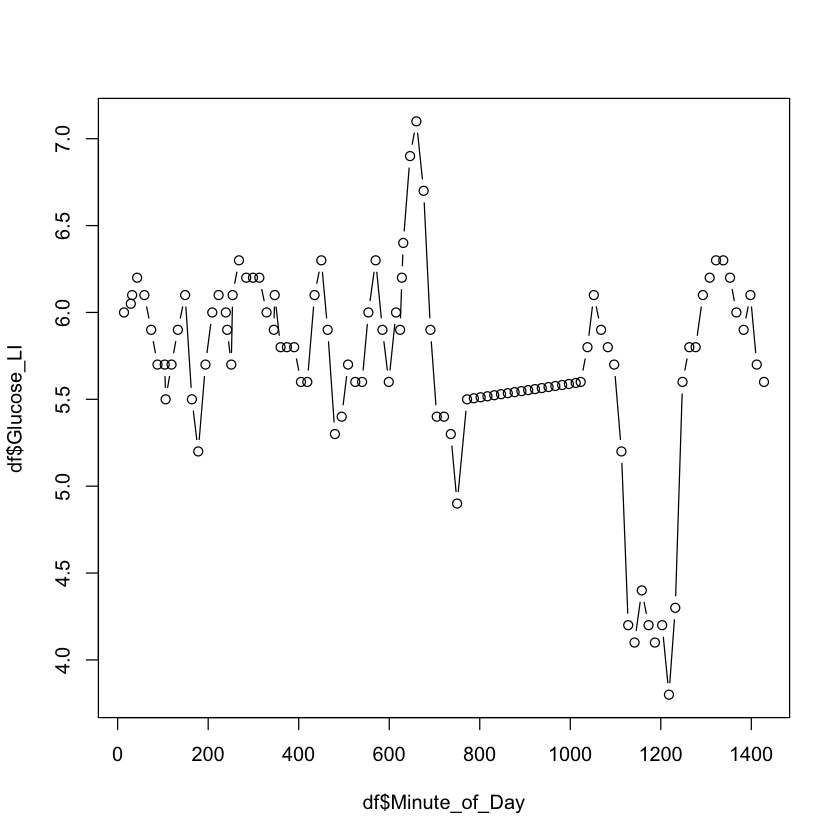

In [11]:
df['Glucose_LI'] <- na_interpolation(df$Inferred_Glucose, option = 'linear')
plot(df$Minute_of_Day, df$Glucose_LI, type = 'b')


# Polynomial Interpolation

In [69]:
library(spatialEco)
df['Glucose_PI'] <- poly.regression(df$Inferred_Glucose, s = 0.2, impute = TRUE, na.only = TRUE)
plot(df$Minute_of_Day, df$Glucose_PI, type = 'b')


ERROR: Error in library(spatialEco): there is no package called ‘spatialEco’


# Spline Interpolation

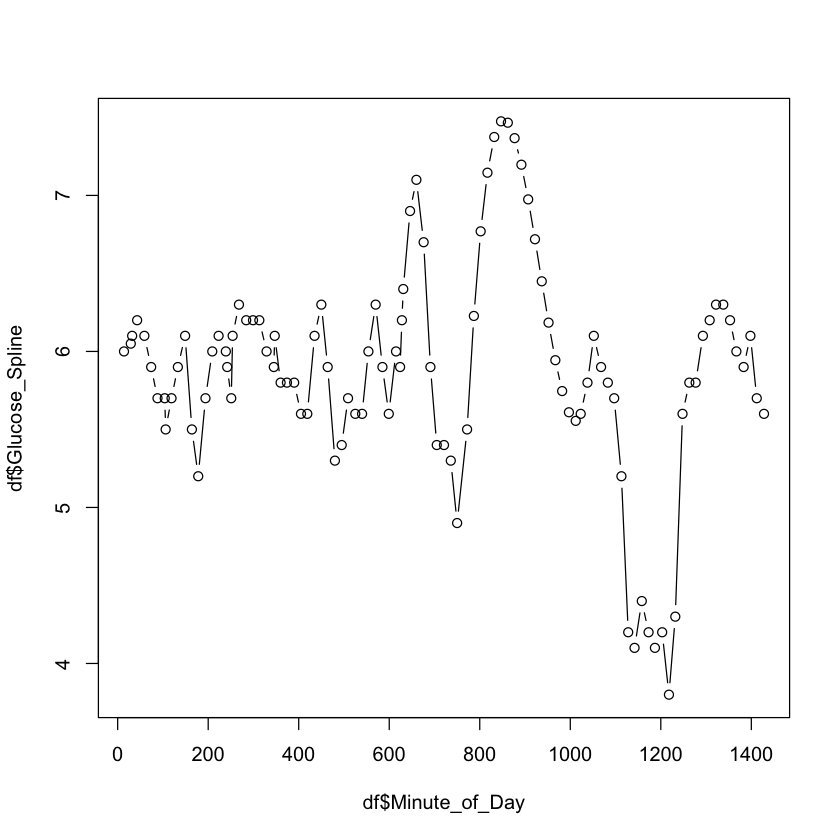

In [24]:
df['Glucose_Spline'] <- na_interpolation(df$Inferred_Glucose, option = 'spline')
plot(df$Minute_of_Day, df$Glucose_Spline, type = 'b')


# Kalman Filtering

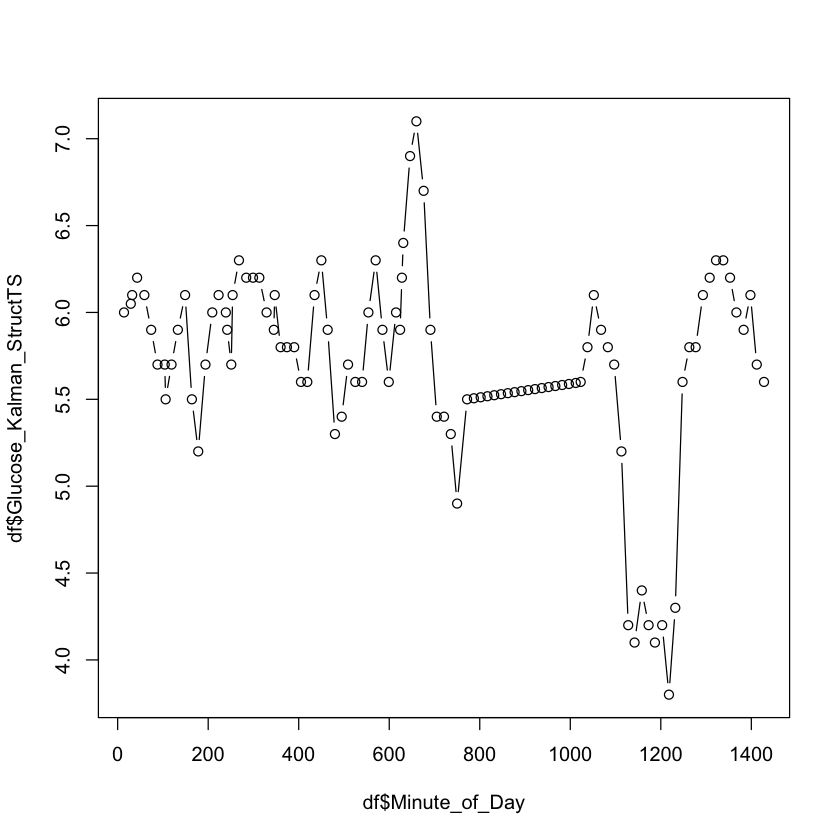

In [25]:
df['Glucose_Kalman_StructTS'] <- na_kalman(df$Inferred_Glucose, model = 'StructTS')
plot(df$Minute_of_Day, df$Glucose_Kalman_StructTS, type = 'b')

                                                 

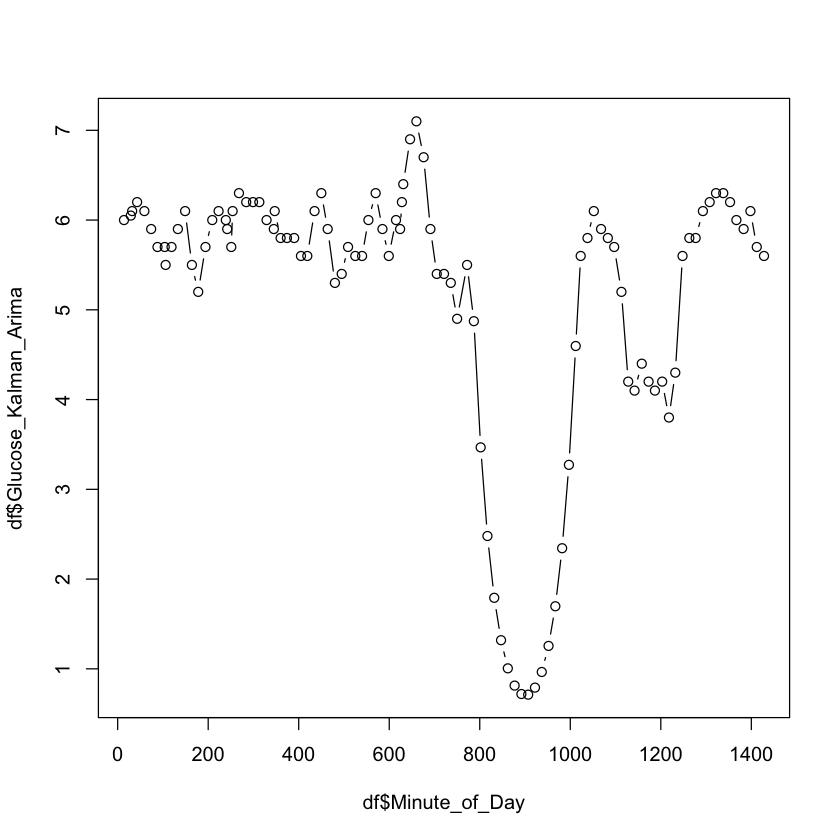

In [26]:
df['Glucose_Kalman_Arima'] <- na_kalman(df$Inferred_Glucose, model = 'auto.arima')
plot(df$Minute_of_Day, df$Glucose_Kalman_Arima, type = 'b')


# Moving Average

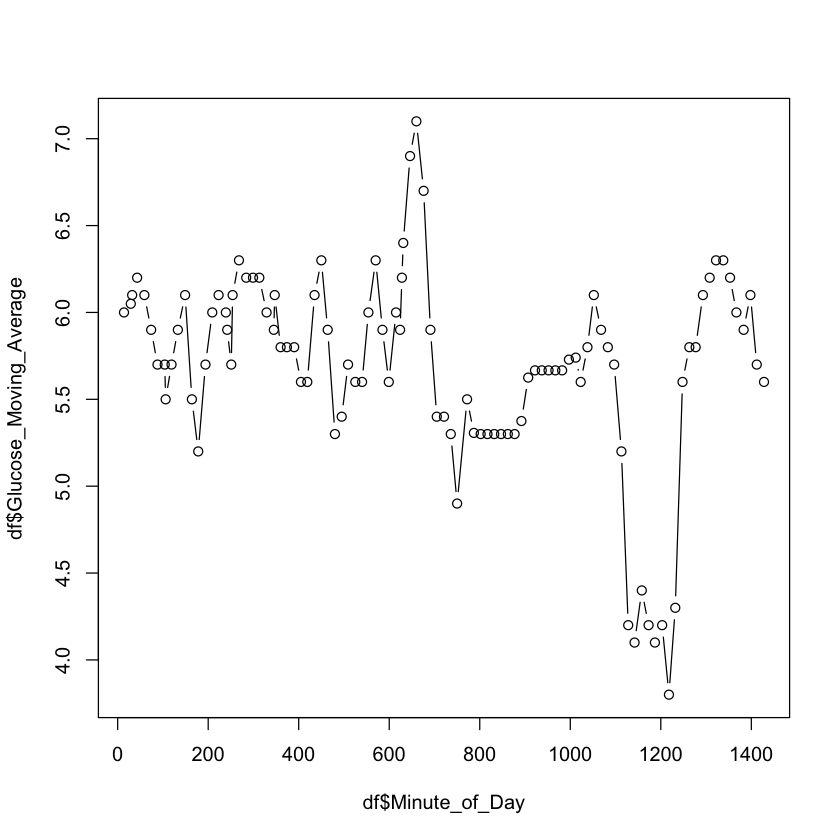

In [27]:
df['Glucose_Moving_Average'] <- na_ma(df$Inferred_Glucose, k = 4)
plot(df$Minute_of_Day, df$Glucose_Moving_Average, type = 'b')
 

# KNN imputation

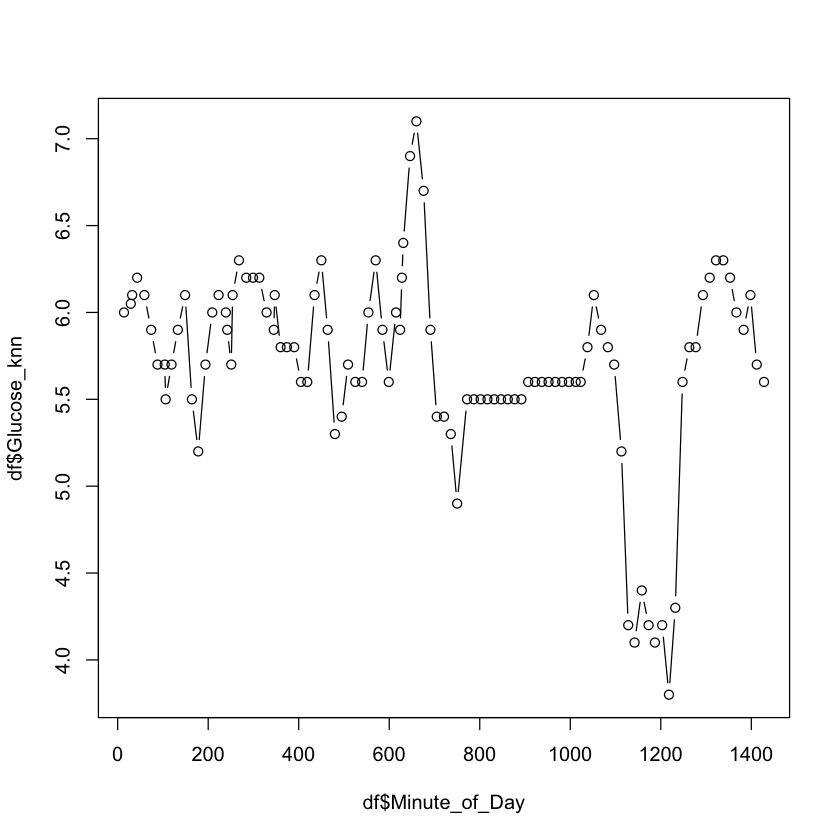

In [31]:
df['Glucose_knn'] <- VIM::kNN(df, variable = "Inferred_Glucose", k = 5)$Inferred_Glucose
plot(df$Minute_of_Day, df$Glucose_knn, type = 'b')
